In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
Accident_data = pd.read_csv(r"C:\Users\HP\Downloads\INTERNSHIP\DS_05\UK_Accident.csv")
Accident_data.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680,178240,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,1,200501BS00002,524170,181650,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,2,200501BS00003,524520,182240,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,3,200501BS00004,526900,177530,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,4,200501BS00005,528060,179040,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


## Data Pre-Processing

In [3]:
# Check for missing values
missing_values = Accident_data.isnull().sum()

# Check data types
data_types = Accident_data.dtypes

missing_values, data_types

(Unnamed: 0                                        0
 Accident_Index                                    0
 Location_Easting_OSGR                             0
 Location_Northing_OSGR                            0
 Longitude                                         0
 Latitude                                          0
 Police_Force                                      0
 Accident_Severity                                 0
 Number_of_Vehicles                                0
 Number_of_Casualties                              0
 Date                                              0
 Day_of_Week                                       0
 Time                                              0
 Local_Authority_(District)                        0
 Local_Authority_(Highway)                         0
 1st_Road_Class                                    0
 1st_Road_Number                                   0
 Road_Type                                         0
 Speed_limit                                  

## Data Analysis and Visualization

In [6]:
# Extract relevant columns
relevant_columns = [
    'Date', 'Time', 'Day_of_Week', 'Accident_Severity', 'Number_of_Vehicles',
    'Number_of_Casualties', 'Light_Conditions', 'Weather_Conditions',
    'Road_Surface_Conditions', 'Latitude', 'Longitude'
]
Accident_data_relevant = Accident_data[relevant_columns]

# Convert 'Date' and 'Time' to datetime
Accident_data_relevant['Date'] = pd.to_datetime(Accident_data_relevant['Date'], errors='coerce')
Accident_data_relevant['Time'] = pd.to_datetime(Accident_data_relevant['Time'], format='%H:%M', errors='coerce').dt.time

# Remove rows with missing latitude or longitude for hotspot analysis
Accident_data_geo = Accident_data_relevant.dropna(subset=['Latitude', 'Longitude'])

#import ace_tools as tools; tools.display_dataframe_to_user(name="Relevant Accident Data", dataframe=Accident_data_relevant)
print("Relevant Accident Data", Accident_data_relevant)

# Display the first few rows of the extracted relevant data
Accident_data_relevant.head()

Relevant Accident Data            Date      Time  Day_of_Week  Accident_Severity  Number_of_Vehicles  \
0    2005-04-01  17:42:00            3                  2                   1   
1    2005-05-01  17:36:00            4                  3                   1   
2    2005-06-01  00:15:00            5                  3                   2   
3    2005-07-01  10:35:00            6                  3                   1   
4    2005-10-01  21:13:00            2                  3                   1   
...         ...       ...          ...                ...                 ...   
1994        NaT  21:55:00            7                  3                   1   
1995        NaT  16:40:00            1                  3                   2   
1996        NaT  06:22:00            4                  3                   2   
1997        NaT  19:46:00            2                  3                   1   
1998        NaT  10:05:00            6                  3                   2   

    

C:\Users\HP\AppData\Local\Temp\ipykernel_20236\2684584434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accident_data_relevant['Date'] = pd.to_datetime(Accident_data_relevant['Date'], errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_20236\2684584434.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accident_data_relevant['Time'] = pd.to_datetime(Accident_data_relevant['Time'], format='%H:%M', errors='coerce').dt.time


,Date,Time,Day_of_Week,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Latitude,Longitude
0,2005-04-01,17:42:00,3,2,1,1,Daylight: Street light present,Raining without high winds,Wet/Damp,51.489096,-0.191170
1,2005-05-01,17:36:00,4,3,1,1,Darkness: Street lights present and lit,Fine without high winds,Dry,51.520075,-0.211708
2,2005-06-01,00:15:00,5,3,2,1,Darkness: Street lights present and lit,Fine without high winds,Dry,51.525301,-0.206458
3,2005-07-01,10:35:00,6,3,1,1,Daylight: Street light present,Fine without high winds,Dry,51.482442,-0.173862
4,2005-10-01,21:13:00,2,3,1,1,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,51.495752,-0.156618


### Accident by road conditions

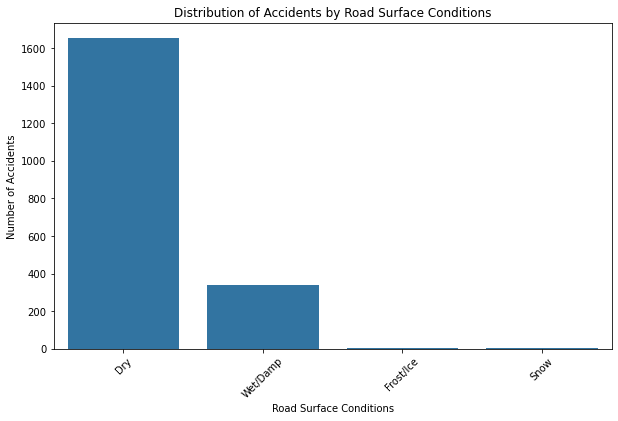

In [7]:
# Distribution of accidents based on road surface conditions
road_conditions_dist = Accident_data_relevant['Road_Surface_Conditions'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=road_conditions_dist.index, y=road_conditions_dist.values)
plt.title('Distribution of Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


### Accidents by Weather condition

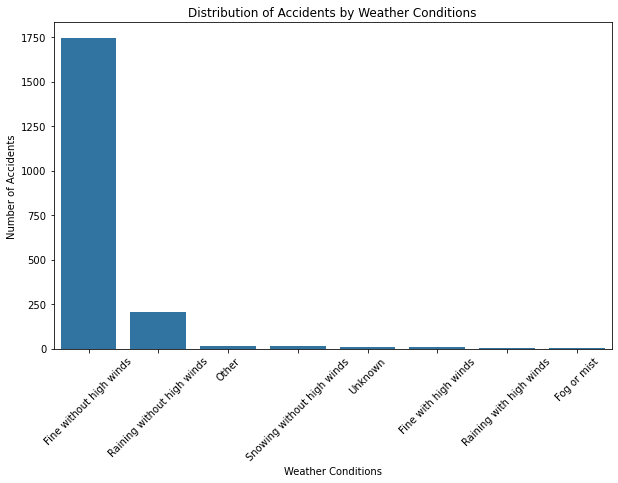

In [8]:
# Distribution of accidents based on weather conditions
weather_conditions_dist = Accident_data_relevant['Weather_Conditions'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=weather_conditions_dist.index, y=weather_conditions_dist.values)
plt.title('Distribution of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

### Accidents by the Day

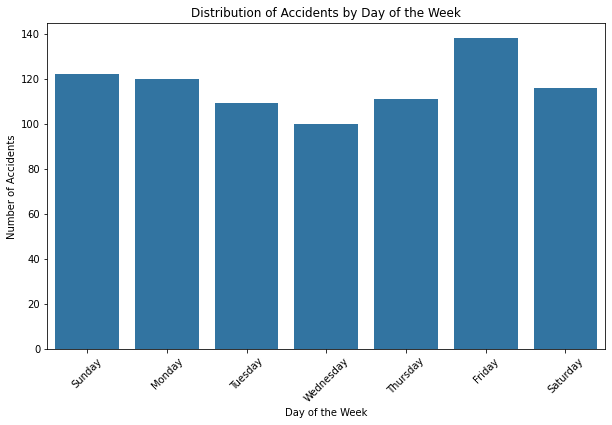

In [18]:
Accident_data['Date'] = pd.to_datetime(Accident_data['Date'], errors='coerce')

# Extract the day of the week
Accident_data['Day_of_Week'] = Accident_data['Date'].dt.dayofweek + 1  # +1 to match the mapping

# Distribution of accidents by day of the week
day_of_week_dist = Accident_data['Day_of_Week'].value_counts().sort_index()

# Mapping day numbers to names for better readability
day_mapping = {
    1: 'Sunday', 
    2: 'Monday', 
    3: 'Tuesday', 
    4: 'Wednesday', 
    5: 'Thursday', 
    6: 'Friday', 
    7: 'Saturday'
}
day_of_week_dist.index = day_of_week_dist.index.map(day_mapping)

# Plotting the distribution of accidents by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_dist.index, y=day_of_week_dist.values)
plt.title('Distribution of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

### Accident Hotspot

In [10]:
import folium
from folium.plugins import HeatMap

In [16]:
# Create a base map
m = folium.Map(location=[Accident_data_relevant['Latitude'].mean(), Accident_data_relevant['Longitude'].mean()], zoom_start=12)

# Add accident data to the heat map
heat_data = [[row['Latitude'], row['Longitude']] for index, row in Accident_data_relevant.iterrows()]
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file
m.save(r"C:\Users\HP\Downloads\INTERNSHIP\DS_05\Geo_data.html")

# Show the map
m

### Accident by Light Conditions

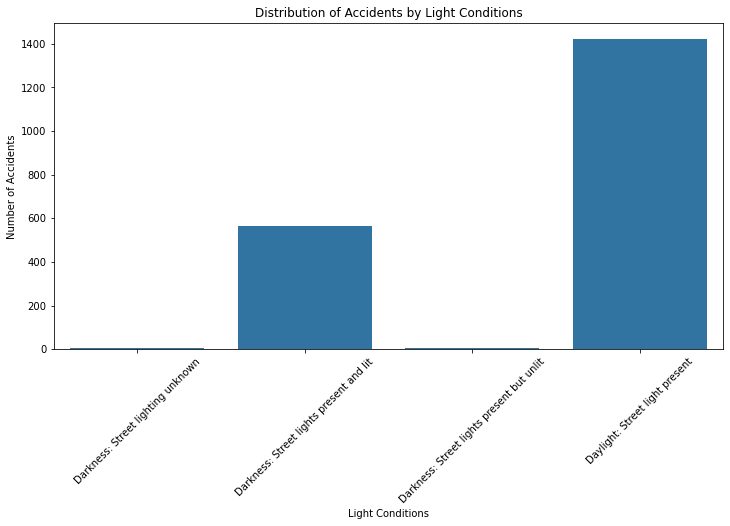

In [20]:
relevant_columns = ['Light_Conditions']
Accident_data_relevant = Accident_data[relevant_columns]

# Distribution of accidents by light conditions
light_conditions_dist = Accident_data_relevant['Light_Conditions'].value_counts().sort_index()

# Plotting the distribution of accidents by light conditions
plt.figure(figsize=(12, 6))
sns.barplot(x=light_conditions_dist.index, y=light_conditions_dist.values)
plt.title('Distribution of Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()